Import Libraries

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns


import matplotlib.pyplot as plt

from sklearn.preprocessing import OrdinalEncoder

from sklearn.impute import SimpleImputer

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression,Lasso , Ridge 

from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score

from sklearn.model_selection import train_test_split, GridSearchCV
import joblib

Read the data

In [28]:
train_data = pd.read_csv(r"LOWA_dataset/train.csv")

Show Information About The Data

In [29]:
# show the information about the data:
print('the information of the data:\n')
train_data.info()

the information of the data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 no

Show The Description Of The Data

In [30]:
# show the description of the data:
print(f'the description of the data: \n {train_data.describe().T}')

the description of the data: 
                 count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBs

Show The Shape Of The Data

In [31]:
# print the shape of the data
print(train_data.shape)

(1460, 81)


Show How Many Null Values In Each Column

In [32]:
# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# show how many null values in each column
print(train_data.isna().sum())

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

Remove columns that have a high proportion of missing values and do not contribute significantly to the data.

In [33]:
drop_Columns = ['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence','MiscFeature','LotFrontage','Id', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']

train_data.drop(drop_Columns, axis=1, inplace= True)

Remove the duplicates if exist

In [34]:
# show how many duplicated rows
print(train_data.duplicated().sum())

# Remove all duplicate rows considering all columns
train_data.drop_duplicates(keep='last', inplace=True)

0


Show the final shape of data

In [35]:
train_data.shape

(1460, 69)

Show number of categorical columns

In [36]:
# Identify categorical (string) columns
categorical_columns = train_data.select_dtypes(include=['object']).columns

# Display the number of categorical columns
num_categorical_columns = len(categorical_columns)
print(f"Number of categorical columns: {num_categorical_columns}")


Number of categorical columns: 35


Deal With Missing Data

In [37]:
numeric_nan_columns = [col for col in train_data.select_dtypes(include=['number']).columns if train_data[col].isnull().any()]

string_nan_columns = [col for col in train_data.select_dtypes(include=['object']).columns if train_data[col].isnull().any()]

numeric_imputer = SimpleImputer(missing_values= np.nan, strategy='mean')
string_imputer = SimpleImputer(missing_values= np.nan, strategy='most_frequent')

# Select only the numeric columns with missing values
train_data[numeric_nan_columns] = numeric_imputer.fit_transform(train_data[numeric_nan_columns])
train_data[string_nan_columns] = string_imputer.fit_transform(train_data[string_nan_columns])

#after the above code is executed the data will no longer have nulls or missing data so it will give us error


# show how many null values in each column
print(train_data.isna().sum().sum()) #---->0



0


Encoding The data using Ordinal Encoding

In [38]:
# Identify categorical (string) columns
categorical_columns = train_data.select_dtypes(include=['object']).columns

# Initialize the OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

# Apply ordinal encoding to the categorical columns
train_data[categorical_columns] = ordinal_encoder.fit_transform(train_data[categorical_columns])

Applying normalization to the data

In [39]:
#Normalization

# Initialize the MinMaxScaler
scaler_MinMax = MinMaxScaler(feature_range=(0, 1))

# Specify columns to normalize
columns_to_normalize = ['OverallQual','GarageCars','GrLivArea','GarageArea','TotalBsmtSF','FullBath','YearBuilt']


# Fit and transform the specified columns
train_data[columns_to_normalize] = scaler_MinMax.fit_transform(train_data[columns_to_normalize])

# Save the scaler
joblib.dump(scaler_MinMax, 'minmax_scaler.joblib')

print("Scaled DataFrame:")
print(train_data.describe().T)

Scaled DataFrame:
                count           mean           std      min            25%  \
MSSubClass     1460.0      56.897260     42.300571     20.0      20.000000   
MSZoning       1460.0       3.028767      0.632017      0.0       3.000000   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.500000   
Street         1460.0       0.995890      0.063996      0.0       1.000000   
LotShape       1460.0       1.942466      1.409156      0.0       0.000000   
LandContour    1460.0       2.777397      0.707666      0.0       3.000000   
Utilities      1460.0       0.000685      0.026171      0.0       0.000000   
LotConfig      1460.0       3.019178      1.622634      0.0       2.000000   
LandSlope      1460.0       0.062329      0.276232      0.0       0.000000   
Neighborhood   1460.0      12.251370      6.013735      0.0       7.000000   
Condition1     1460.0       2.031507      0.868515      0.0       2.000000   
Condition2     1460.0       2.008219      0.25

Removing outliers

In [40]:
# Example: Remove outliers using IQR
Q1 = train_data.quantile(0.25)
Q3 = train_data.quantile(0.75)
IQR = Q3 - Q1

train_data = train_data[~((train_data < (Q1 - 1.5 * IQR)) | (train_data > (Q3 + 1.5 * IQR))).any(axis=1)]


Showing the Box plot

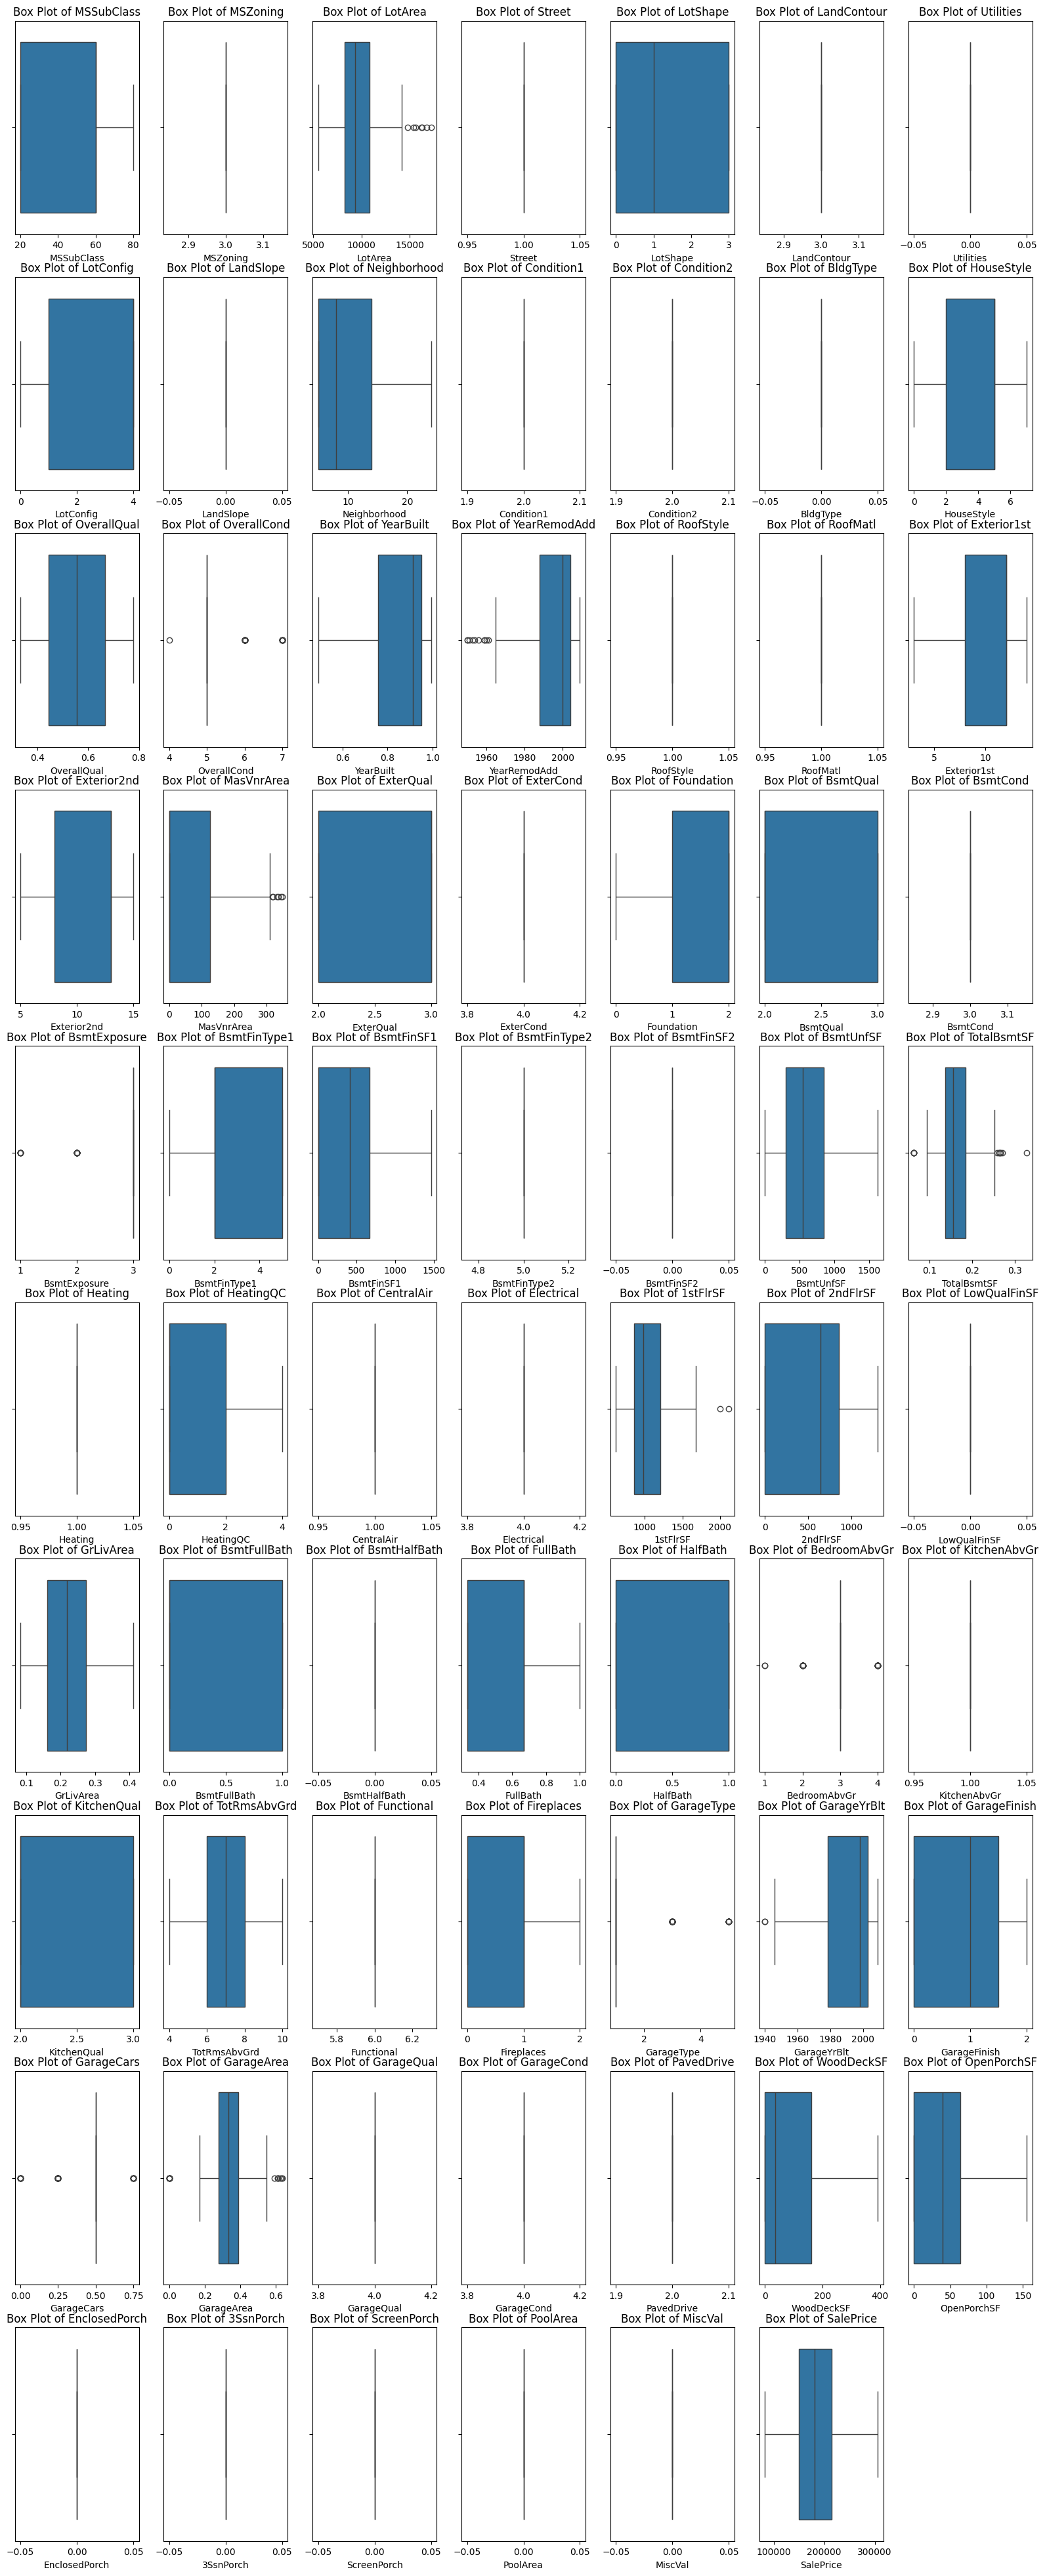

In [41]:
plt.figure(figsize=(20, 60))
for i, column in enumerate(train_data.columns[:74], 1):
    plt.subplot(12, 7, i)  # Position the plot in the i-th subplot
    sns.boxplot(x=train_data[column])  # Plot the box plot for the current column
    plt.title(f'Box Plot of {column}')  # Set the title of the plot


Showing Correlation

<Axes: >

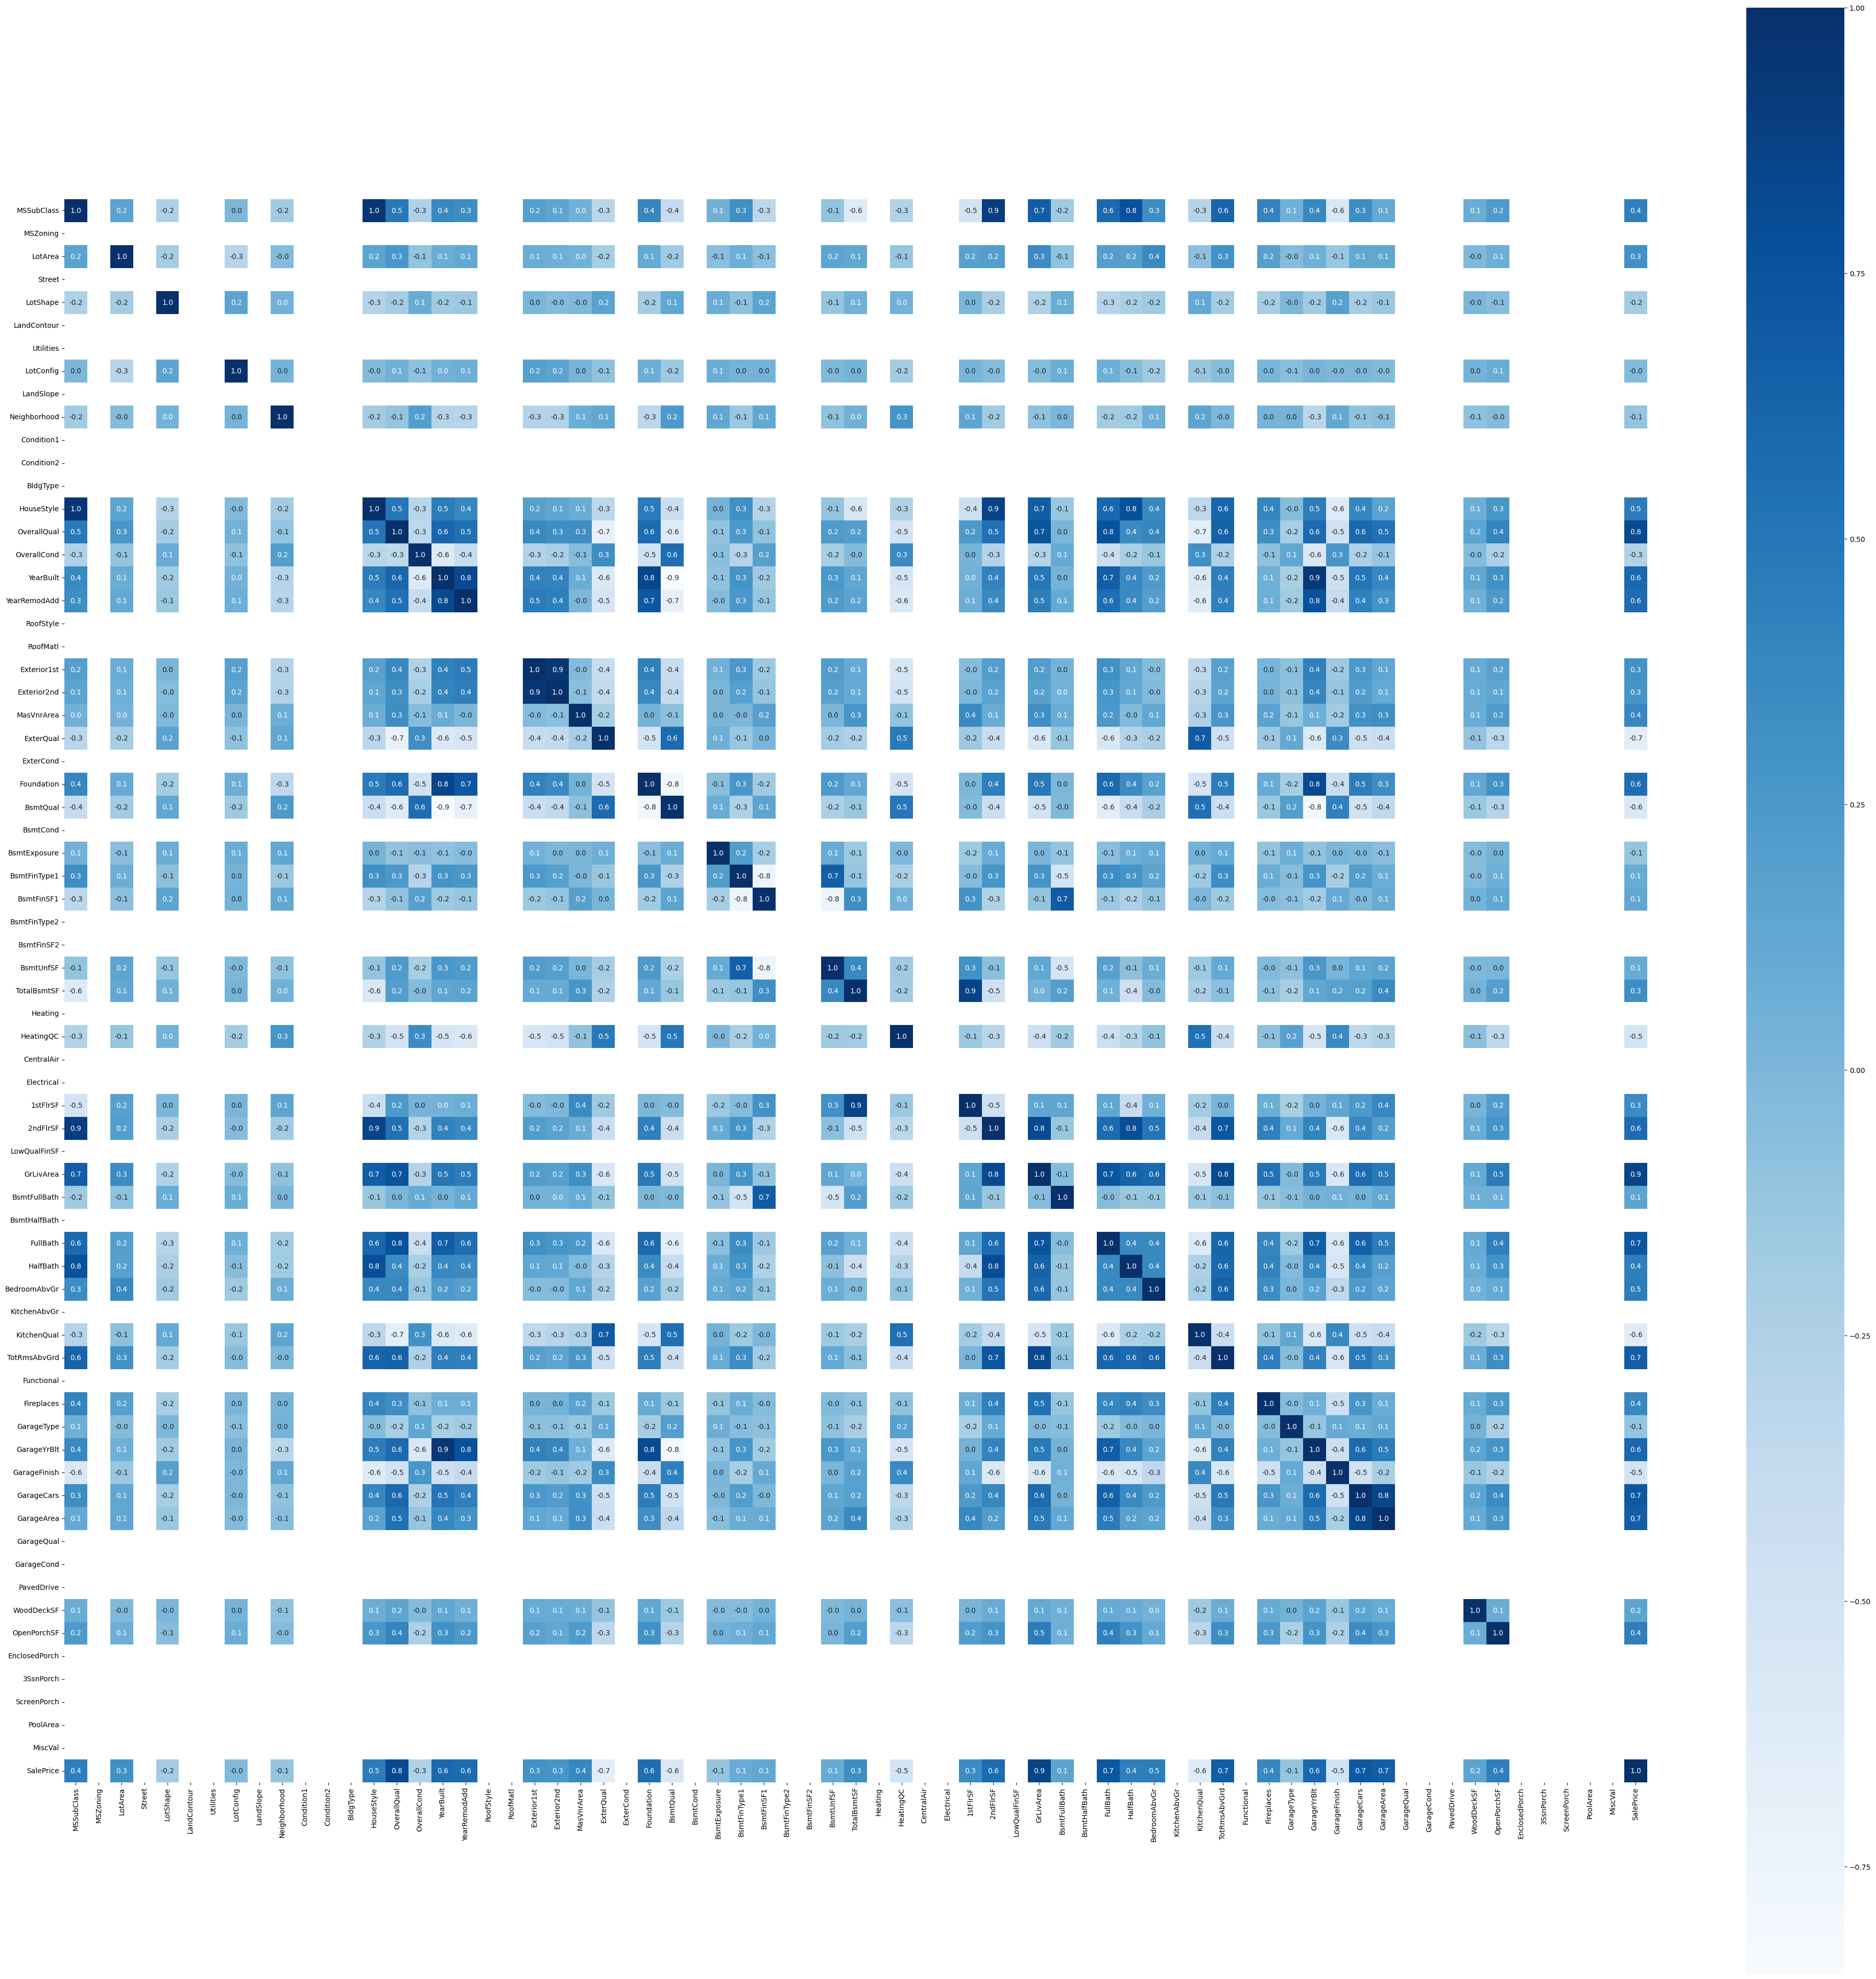

In [42]:
plt.figure(figsize= (50,50))
correlation = train_data.corr()
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':10}, cmap='Blues',xticklabels=correlation.columns,yticklabels=correlation.columns)

Split the data to training and test

In [43]:
x1 = train_data['OverallQual'].values.reshape(-1,1)
y1 = train_data['SalePrice'].values.reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.2, random_state = 0)

Train the model using simple linear regression based on the OverallQual feature

In [44]:
# loading the model
model_Simple_LinearReg = LinearRegression()

# # training the model
model_Simple_LinearReg.fit(x_train, y_train)

LinearRegression()

Test The Model Using Test Set

In [45]:

y_pred_simple_linearReg = model_Simple_LinearReg.predict(x_test)

print(r2_score(y_test, y_pred_simple_linearReg))

# Compute Mean Squared Error
mse = mean_squared_error(y_test, y_pred_simple_linearReg)

# Compute Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred_simple_linearReg)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")

0.7602692734783567
Mean Squared Error (MSE): 451743240.9635166
Mean Absolute Error (MAE): 17297.28390100718


Multiple Linear Regression

In [46]:
x2 = train_data[['OverallQual','GarageCars','GrLivArea','GarageArea','TotalBsmtSF','FullBath','YearBuilt']]
y2 = train_data['SalePrice']
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y1, test_size = 0.2, random_state = 0)

#model

Multiple_linearReg_Model = LinearRegression()
Multiple_linearReg_Model.fit(x_train2,y_train2)
y_pred_Multiple_LinearReg = Multiple_linearReg_Model.predict(x_test2)



Evaluate the multiple linear regression model

In [47]:
# Calculate the R-squared score
Multiple_r2 = r2_score(y_test2, y_pred_Multiple_LinearReg)

# Compute Mean Squared Error
mse_multiple = mean_squared_error(y_test2, y_pred_Multiple_LinearReg)

# Compute Mean Absolute Error
mae_multiple = mean_absolute_error(y_test2, y_pred_Multiple_LinearReg)

print(f"R-squared score: {Multiple_r2}")
print(f"Mean Squared Error (MSE): {mse_multiple}")
print(f"Mean Absolute Error (MAE): {mae_multiple}")

R-squared score: 0.9079058414170798
Mean Squared Error (MSE): 173540181.00095508
Mean Absolute Error (MAE): 11188.91757371643


Lasso regression

In [48]:
lasso_model = Lasso()
lasso_model.fit(x_train2, y_train2)


param_grid = {

    'alpha' : [0.1,0.001,0.0001,1,100]
}

lasso_cv = GridSearchCV(lasso_model, param_grid , cv=3 , n_jobs=-1)

lasso_cv.fit(x_train2, y_train2)

y_pred_Lasso = lasso_cv.predict(x_test2)





Evaluate lasso regression model

In [49]:
# Calculate the R-squared score
Lasso_r2 = r2_score(y_test2, y_pred_Lasso)

# Compute Mean Squared Error
mse_lasso = mean_squared_error(y_test2, y_pred_Lasso)

# Compute Mean Absolute Error
mae_lasso = mean_absolute_error(y_test2, y_pred_Lasso)

print(f"R-squared score: {Lasso_r2}")
print(f"Mean Squared Error (MSE): {mse_lasso}")
print(f"Mean Absolute Error (MAE): {mae_lasso}")

R-squared score: 0.8997985826679747
Mean Squared Error (MSE): 188817318.79547086
Mean Absolute Error (MAE): 11499.964926953966


Ridge regression Model

In [50]:
Ridge_model = Ridge()
Ridge_model.fit(x_train2, y_train2)


param_grid = {

    'alpha' : [0.1,0.001,0.0001,1,100]
}

Ridge_cv = GridSearchCV(lasso_model, param_grid , cv=3 , n_jobs=-1)

Ridge_cv.fit(x_train2, y_train2)

y_pred_Ridge = Ridge_cv.predict(x_test2)

Evaluate the ridge regression model

In [51]:
# Calculate the R-squared score
Ridge_r2 = r2_score(y_test2, y_pred_Ridge)

# Compute Mean Squared Error
mse_Ridge = mean_squared_error(y_test2, y_pred_Ridge)

# Compute Mean Absolute Error
mae_Ridge = mean_absolute_error(y_test2, y_pred_Ridge)

print(f"R-squared score: {Ridge_r2}")
print(f"Mean Squared Error (MSE): {mse_Ridge}")
print(f"Mean Absolute Error (MAE): {mae_Ridge}")

R-squared score: 0.8997985826679747
Mean Squared Error (MSE): 188817318.79547086
Mean Absolute Error (MAE): 11499.964926953966


Saving the Ridge Regression Model

In [52]:
joblib.dump(Ridge_model, 'house_price_model.joblib')

['house_price_model.joblib']